In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

ImportError: DLL load failed while importing _multiarray_umath: The specified module could not be found.

ImportError: DLL load failed while importing _multiarray_umath: The specified module could not be found.

ImportError: DLL load failed while importing _multiarray_umath: The specified module could not be found.

ImportError: DLL load failed while importing _multiarray_umath: The specified module could not be found.

In [2]:
path = "F:\\git\\network_miner\\temp\\data\\064_000500_0000.5.hdf5"
# path = "/media/dan/Data/git/network_miner/temp/data/064_000500_0000.5.hdf5"
with h5py.File(path, "r") as f:
    A_mats_001 = f['data']['A_mats'][2,1,:] 
    A_mats_001_mask = f['data']['A_mask'][:10000]
    full_A_mats_001_shape = f['data']['A_mats'].shape

In [3]:
path = "F:\\git\\network_miner\\temp\\data\\064_000500_000050.hdf5"
# path = "/media/dan/Data/git/network_miner/temp/data/064_000500_000050.hdf5"
with h5py.File(path, "r") as f:
    A_mats_050 = f['data']['A_mats'][:] 
    A_mats_050_mask = f['data']['A_mask'][:]
    soz = f['metadata']["patient_info"]['soz'][:].astype(bool)
    
path = "F:\\git\\network_miner\\temp\\data\\064_000500_000250.hdf5"
# path = "/media/dan/Data/git/network_miner/temp/data/064_000500_000250.hdf5"
with h5py.File(path, "r") as f:
    A_mats_250 = f['data']['A_mats'][:]
    A_mats_250_mask = f['data']['A_mask'][:]

path = "F:\\git\\eeg_prep\\processed_files\\064_000500_000500.hdf5"
# path = "/media/dan/Data/git/eeg_prep/processed_files/064_000500_000500.hdf5"
with h5py.File(path, "r") as f:
    A_mats_500 = f['data']['A_mats'][:]
    A_mats_500_mask = f['data']['A_mask'][:]

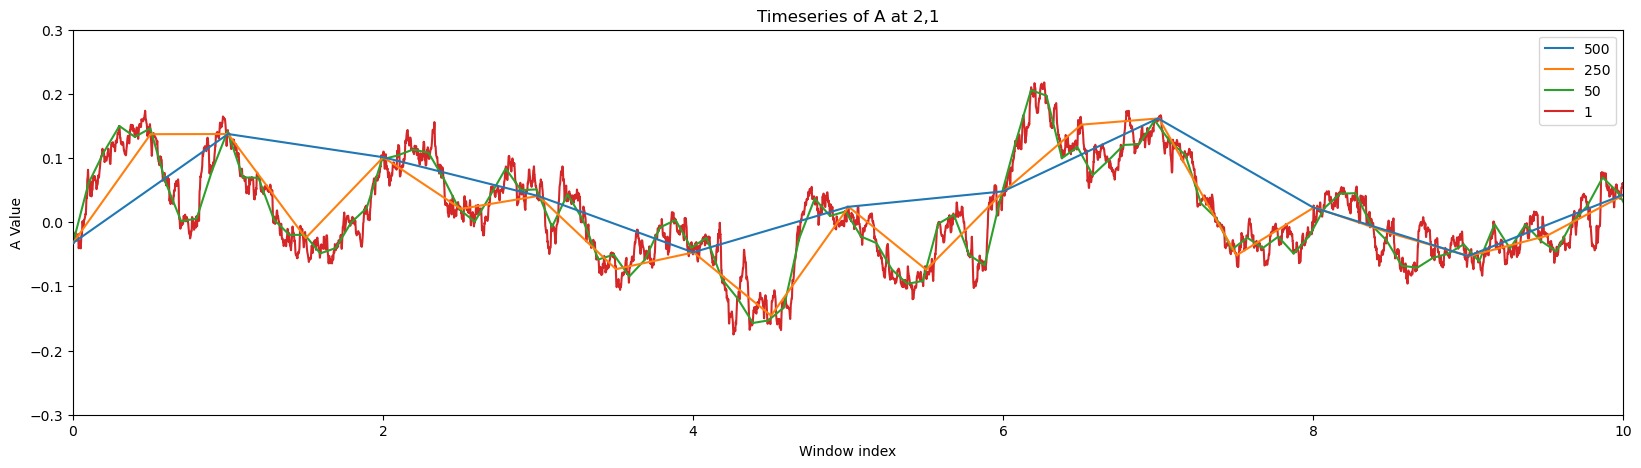

In [4]:
x_001 = np.linspace(0,A_mats_500.shape[2],full_A_mats_001_shape[-1])[:A_mats_001.shape[-1]]

x_050 = np.linspace(0,A_mats_500.shape[2],A_mats_050.shape[2])
x_250 = np.linspace(0,A_mats_500.shape[2],A_mats_250.shape[2])
x_500 = np.arange(0,A_mats_500.shape[2])

plt.figure(figsize=(20,5))
plt.plot(x_500,A_mats_500[2,1,:],label="500", zorder=4)
plt.plot(x_250,A_mats_250[2,1,:],label="250", zorder=3)
plt.plot(x_050,A_mats_050[2,1,:],label="50", zorder=2)
plt.plot(x_001,A_mats_001[:],label="1", zorder=1)
# plt.axhline(np.mean(A_mats_500[2,1,A_mats_500_mask]),c="b",linestyle="--")

plt.xlim(0,10)
plt.ylim(-.3,.3)
plt.legend()
plt.xlabel("Window index")
plt.ylabel("A Value")
plt.title("Timeseries of A at 2,1")
plt.show()


In [5]:

import numpy as np
import matplotlib.pyplot as plt

import numpy as np

def recurrence_plot(data, percent_ones=0.05):
    """
    Generate a recurrence plot from a time series, setting the threshold to ensure a certain percentage of ones.

    :param data: Time series data
    :param percent_ones: Proportion of ones in the output matrix (between 0 and 1)
    :return: Recurrence plot
    """
    # Calculate the distance matrix
    data = np.array(data).reshape(-1, 1)
    distance_matrix = np.abs(data - data.T)

    # Flatten and sort distances to find the threshold
    flattened_distances = distance_matrix.flatten()
    sorted_distances = np.sort(flattened_distances)
    
    # Find the cutoff distance corresponding to the desired percentage of ones
    cutoff_index = int(percent_ones * len(sorted_distances))
    threshold = sorted_distances[cutoff_index]

    # Create the recurrence plot based on the calculated threshold
    recurrence_plot = np.where(distance_matrix <= threshold, 1, 0)

    return recurrence_plot


In [6]:
tick_positions = [idx for idx, value in enumerate(soz) if value]
tick_positions

[62, 63, 64, 83, 84, 85]

In [7]:
# np.where((x_001<=100.01) & (x_001>=99.9))

In [8]:
print(x_001[102337])
print(x_050[1004])
print(x_250[200])
print(x_500[100])

100.00076940058176
100.08411988739859
100.08312551953449
100


# no overlap

Text(0.5, 0.98, 'Recurrence plot of A at 2,1 for stepsize 500')

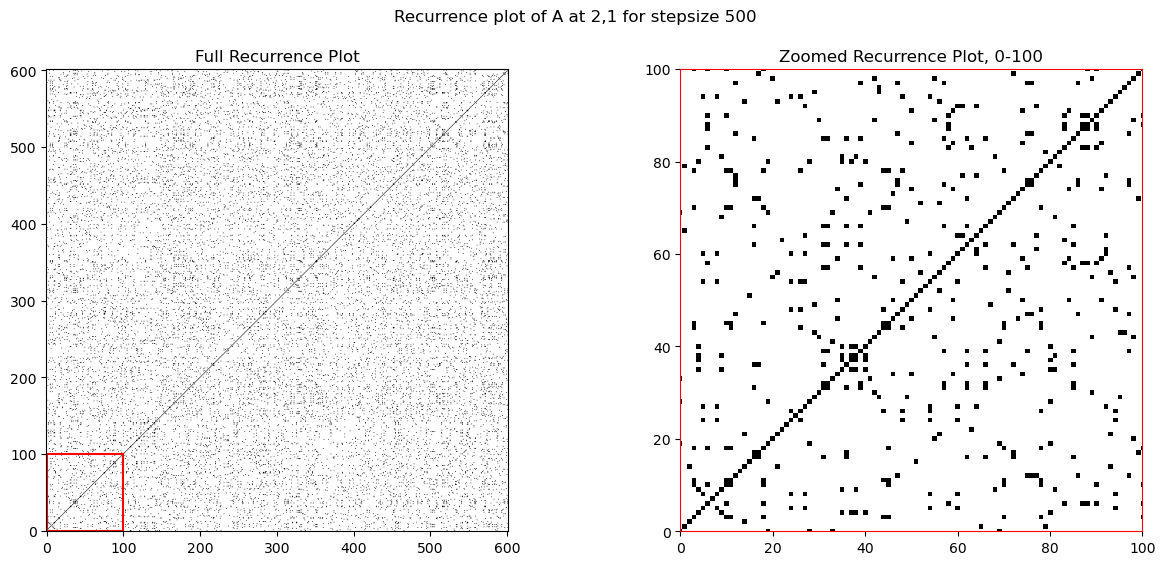

In [9]:
i = 2
j = 1
rec = recurrence_plot(A_mats_500[i,j,:], 0.05)
fig, ax = plt.subplots(1,2,figsize=(15,6))
x = 100
ax[0].imshow(rec, cmap='binary', origin='lower')
ax[0].plot([0,0],[x,0],c='r',linestyle='-')
ax[0].plot([x,0],[x,x],c='r',linestyle='-')
ax[0].plot([x,x],[x,0],c='r',linestyle='-')
ax[0].plot([0,x],[0,0],c='r',linestyle='-')

ax[0].set_title('Full Recurrence Plot')

ax[1].imshow(rec, cmap='binary', origin='lower')
ax[1].set_xlim(0,x)
ax[1].set_ylim(0,x)
ax[1].set_title(f'Zoomed Recurrence Plot, 0-{x}')
ax[1].spines['bottom'].set_color('r')
ax[1].spines['top'].set_color('r') 
ax[1].spines['right'].set_color('r')
ax[1].spines['left'].set_color('r')
plt.suptitle(f"Recurrence plot of A at {i},{j} for stepsize 500")


# half overlap

Text(0.5, 0.98, 'Recurrence plot of A at 2,1 for stepsize 250')

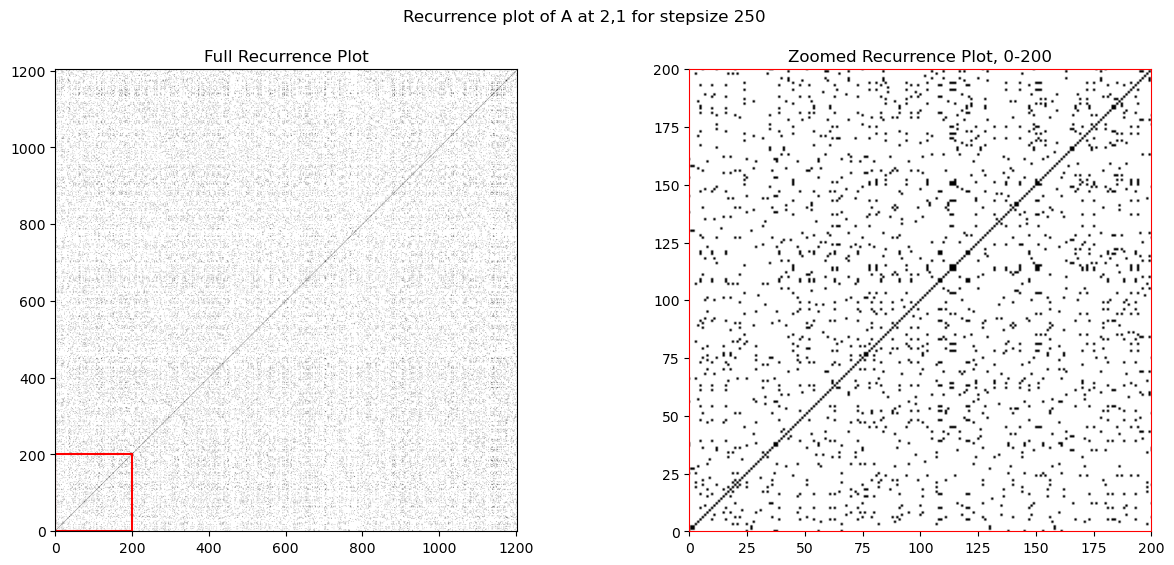

In [10]:
i = 2
j = 1
rec = recurrence_plot(A_mats_250[i,j,:], 0.05)
fig, ax = plt.subplots(1,2,figsize=(15,6))
x = 200
ax[0].imshow(rec, cmap='binary', origin='lower')
ax[0].plot([0,0],[x,0],c='r',linestyle='-')
ax[0].plot([x,0],[x,x],c='r',linestyle='-')
ax[0].plot([x,x],[x,0],c='r',linestyle='-')
ax[0].plot([0,x],[0,0],c='r',linestyle='-')

ax[0].set_title('Full Recurrence Plot')

ax[1].imshow(rec, cmap='binary', origin='lower')
ax[1].set_xlim(0,x)
ax[1].set_ylim(0,x)
ax[1].set_title(f'Zoomed Recurrence Plot, 0-{x}')
ax[1].spines['bottom'].set_color('r')
ax[1].spines['top'].set_color('r') 
ax[1].spines['right'].set_color('r')
ax[1].spines['left'].set_color('r')
plt.suptitle(f"Recurrence plot of A at {i},{j} for stepsize 250")


# step 50

Text(0.5, 0.98, 'Recurrence plot of A at 2,1 for stepsize 50')

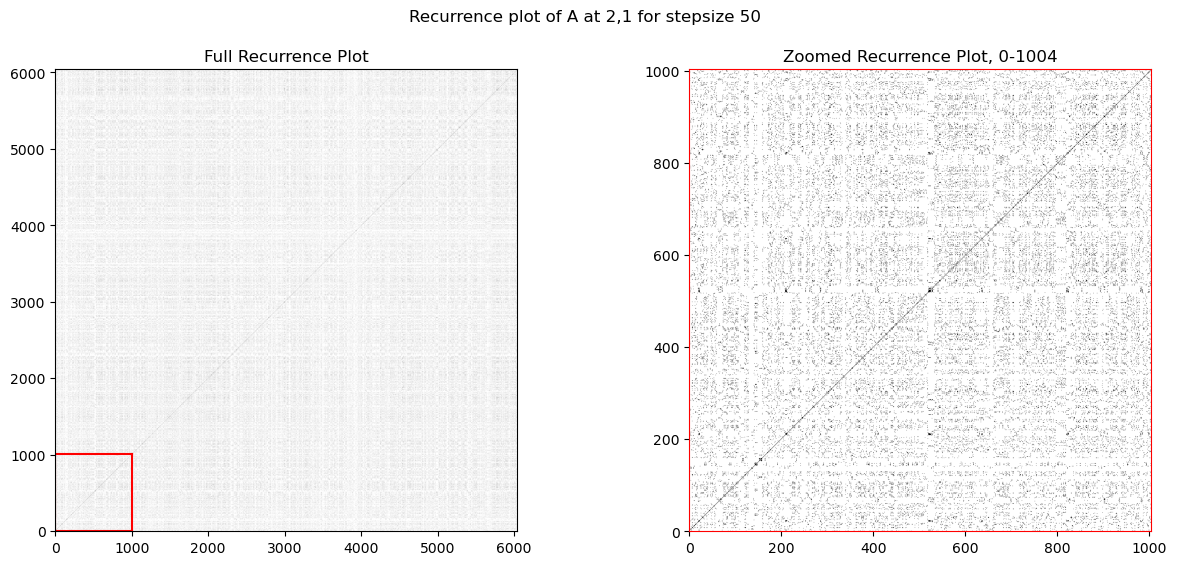

In [11]:
i = 2
j = 1
rec = recurrence_plot(A_mats_050[i,j,:], 0.05)
fig, ax = plt.subplots(1,2,figsize=(15,6))
x = 1004
ax[0].imshow(rec, cmap='binary', origin='lower')
ax[0].plot([0,0],[x,0],c='r',linestyle='-')
ax[0].plot([x,0],[x,x],c='r',linestyle='-')
ax[0].plot([x,x],[x,0],c='r',linestyle='-')
ax[0].plot([0,x],[0,0],c='r',linestyle='-')

ax[0].set_title('Full Recurrence Plot')

ax[1].imshow(rec, cmap='binary', origin='lower')
ax[1].set_xlim(0,x)
ax[1].set_ylim(0,x)
ax[1].set_title(f'Zoomed Recurrence Plot, 0-{x}')
ax[1].spines['bottom'].set_color('r')
ax[1].spines['top'].set_color('r') 
ax[1].spines['right'].set_color('r')
ax[1].spines['left'].set_color('r')
plt.suptitle(f"Recurrence plot of A at {i},{j} for stepsize 50")


# step 1

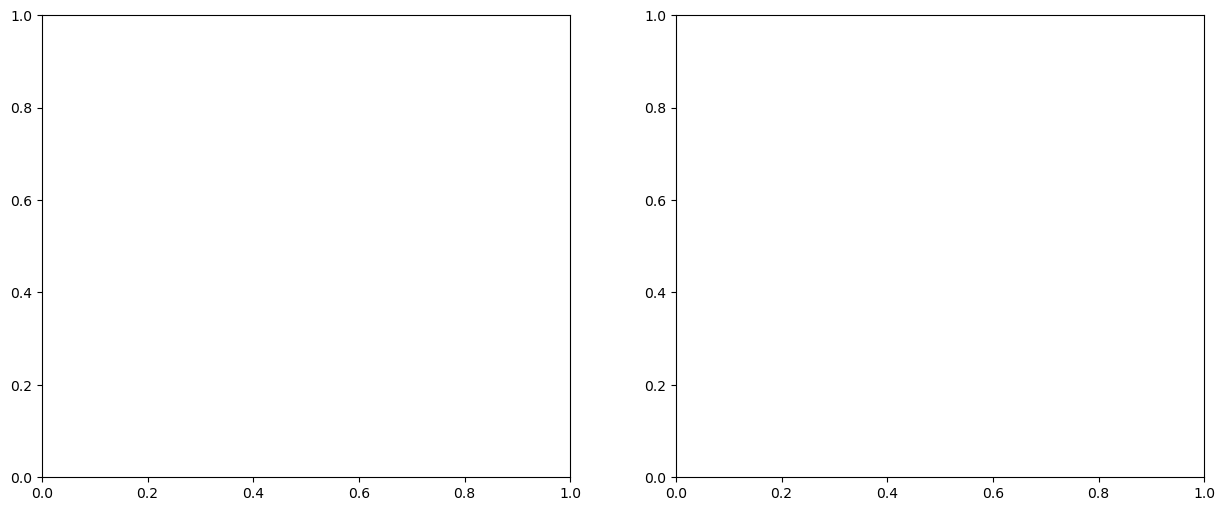

In [12]:
i = 2
j = 1
rec = recurrence_plot(A_mats_001[:100000], 0.05)
fig, ax = plt.subplots(1,2,figsize=(15,6))
# x = 1000
# ax[0].imshow(rec, cmap='binary', origin='lower')
# ax[0].plot([0,0],[x,0],c='r',linestyle='-')
# ax[0].plot([x,0],[x,x],c='r',linestyle='-')
# ax[0].plot([x,x],[x,0],c='r',linestyle='-')
# ax[0].plot([0,x],[0,0],c='r',linestyle='-')

# ax[0].set_title('partal Recurrence Plot')

# ax[1].imshow(rec, cmap='binary', origin='lower')
# ax[1].set_xlim(0,x)
# ax[1].set_ylim(0,x)
# ax[1].set_title(f'Zoomed Recurrence Plot, 0-{x}')
# ax[1].spines['bottom'].set_color('r')
# ax[1].spines['top'].set_color('r') 
# ax[1].spines['right'].set_color('r')
# ax[1].spines['left'].set_color('r')
# plt.suptitle(f"Recurrence plot of A at {i},{j} for stepsize 1")


Text(0.5, 0.98, 'Recurrence plot of A at 2,1 for stepsize 1')

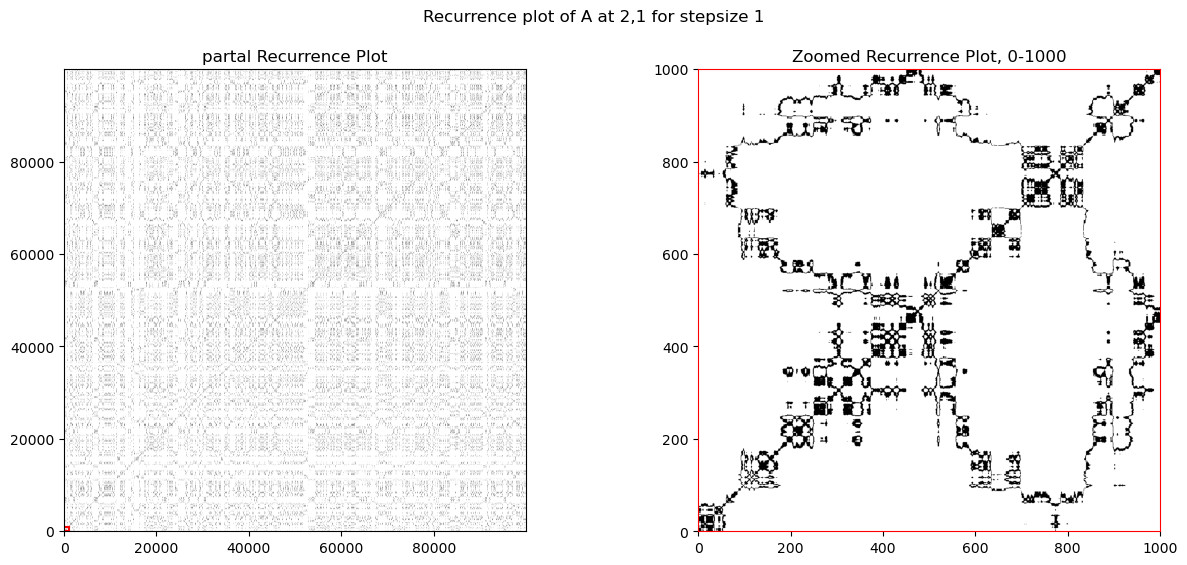

In [14]:
fig, ax = plt.subplots(1,2,figsize=(15,6))
x = 1000
ax[0].imshow(rec, cmap='binary', origin='lower')
ax[0].plot([0,0],[x,0],c='r',linestyle='-')
ax[0].plot([x,0],[x,x],c='r',linestyle='-')
ax[0].plot([x,x],[x,0],c='r',linestyle='-')
ax[0].plot([0,x],[0,0],c='r',linestyle='-')

ax[0].set_title('partal Recurrence Plot')

ax[1].imshow(rec[:x,:x], cmap='binary', origin='lower')
ax[1].set_xlim(0,x)
ax[1].set_ylim(0,x)
ax[1].set_title(f'Zoomed Recurrence Plot, 0-{x}')
ax[1].spines['bottom'].set_color('r')
ax[1].spines['top'].set_color('r') 
ax[1].spines['right'].set_color('r')
ax[1].spines['left'].set_color('r')
plt.suptitle(f"Recurrence plot of A at {i},{j} for stepsize 1")


Text(0.5, 0.98, 'Recurrence plot of A at 2,1 for stepsize 1')

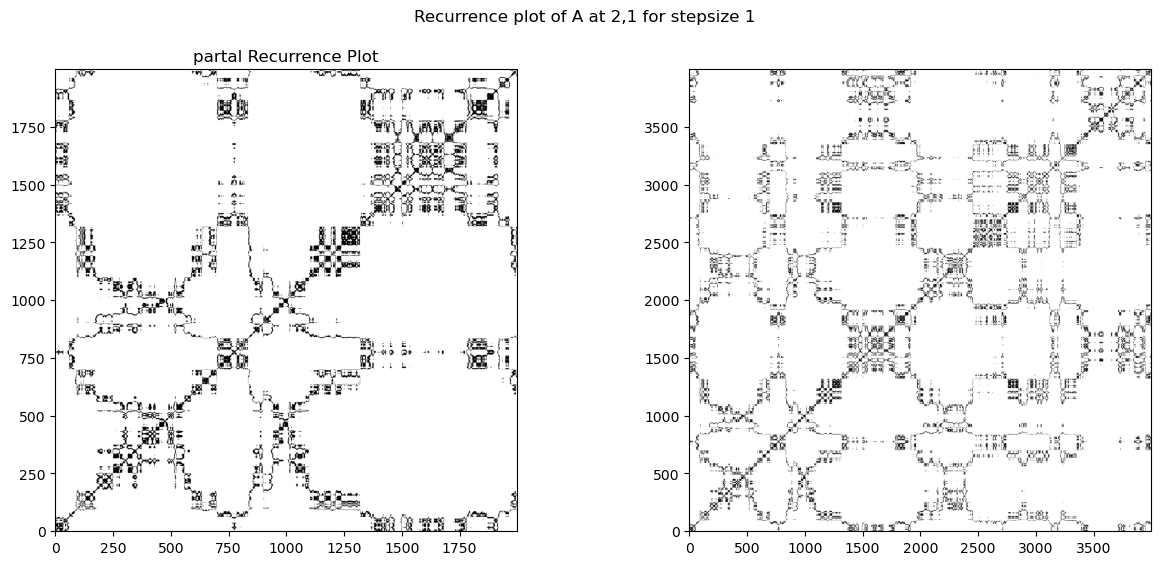

In [15]:
fig, ax = plt.subplots(1,2,figsize=(15,6))
x = 1000
ax[0].imshow(rec[:x*2,:x*2], cmap='binary', origin='lower')


ax[0].set_title('partal Recurrence Plot')

ax[1].imshow(rec[:x*4,:x*4], cmap='binary', origin='lower')

plt.suptitle(f"Recurrence plot of A at {i},{j} for stepsize 1")


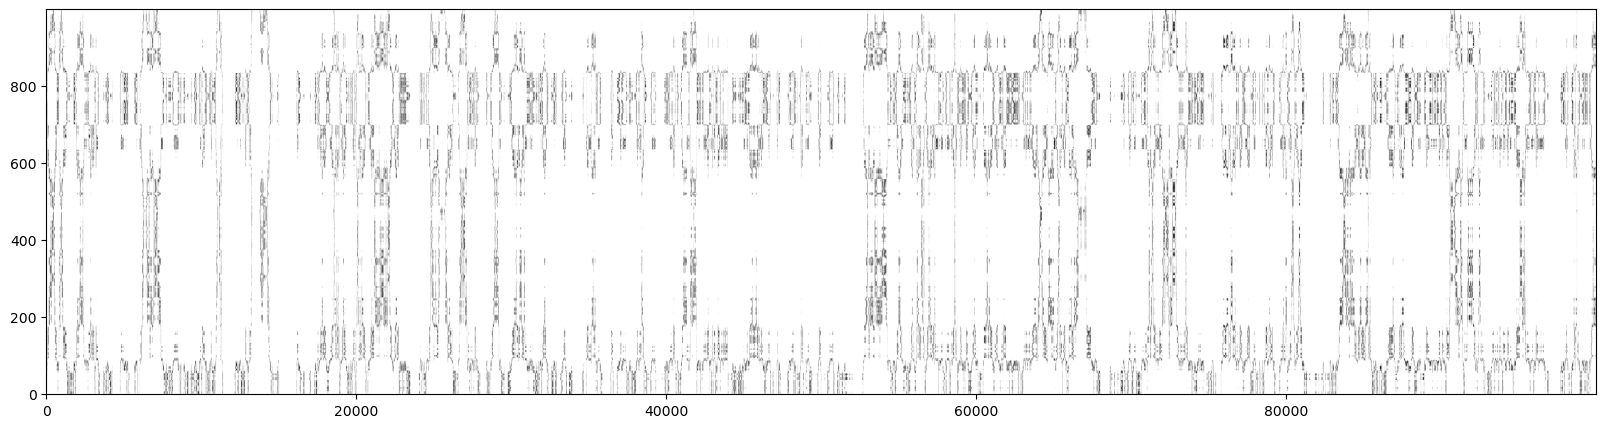

In [21]:
plt.figure(figsize=(20,5))
plt.imshow(rec[:,:1000].T, cmap='binary', origin='lower', aspect='auto')

